In [1]:
import pandas as pd
import numpy as np
import random
# GAME_ID HOME_TEAM_ID VISITOR_TEAM_ID HOME_TEAM_WINS SEASON


# Load the NBA dataset into a DataFrame
nba_df = pd.read_csv('games.csv')

# Find the 15 teams that have played the most number of matches
all_teams = set(nba_df['HOME_TEAM_ID'].unique()) | set(nba_df['VISITOR_TEAM_ID'].unique())
team_match_counts = {}

for team_id in all_teams:
    home_matches = nba_df[nba_df['HOME_TEAM_ID'] == team_id]
    away_matches = nba_df[nba_df['VISITOR_TEAM_ID'] == team_id]
    total_matches = len(home_matches) + len(away_matches)
    team_match_counts[team_id] = total_matches

top_teams = sorted(team_match_counts, key=team_match_counts.get, reverse=True)[:15]

# Filter matches involving the top 15 teams
filtered_matches = nba_df[(nba_df['HOME_TEAM_ID'].isin(top_teams)) & (nba_df['VISITOR_TEAM_ID'].isin(top_teams))]

# Sort the filtered matches by season from most recent to old
filtered_matches = filtered_matches.sort_values(by='SEASON', ascending=False)

# Create a new DataFrame with the desired columns
# new_df = filtered_matches[['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS', 'SEASON']]

# Rename columns for clarity
# new_df = new_df.rename(columns={
#     'HOME_TEAM_ID': 'Home_team_id',
#     'VISITOR_TEAM_ID': 'Away_team_id',
#     'HOME_TEAM_WINS': 'Winner'
# })

# Save the new DataFrame to a CSV file
# new_df.to_csv('filtered_nba_matches.csv', index=False)


In [2]:
print(top_teams)

[1610612748, 1610612738, 1610612759, 1610612747, 1610612744, 1610612742, 1610612739, 1610612745, 1610612743, 1610612754, 1610612737, 1610612760, 1610612765, 1610612746, 1610612749]


In [3]:

print(str(filtered_matches['SEASON']))
range(2003, 2023)

2        2022
329      2022
381      2022
379      2022
372      2022
         ... 
18315    2003
18307    2003
18306    2003
18304    2003
19017    2003
Name: SEASON, Length: 6707, dtype: int64


range(2003, 2023)

In [7]:
# Calculate the number of times j defeats i for each year
# i = Host vs j =  away => p_host,away = + 1 if away defeats host
years = [year for year in range(2018, 2022)]
prob_matrices = {}
count_matrices = {}

total = 0
total1 = 0
total2 = 0
cumulative_prob_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
cumulative_count_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
nested_list = pd.DataFrame(columns=top_teams, index=top_teams)

# Fill the DataFrame with empty lists
for team1 in top_teams:
    for team2 in top_teams:
        nested_list.at[team1, team2] = []

# 2022 is the most recent year.
years = range(2001, 2022)  
start_year = 2022 
end_year = 2001
total_num_years = 18
Z = [[[[] for _ in range(len(top_teams))] for _ in range(len(top_teams))] for _ in range(total_num_years)]

team_to_index = {team: idx for idx, team in enumerate(top_teams)}

for num_years in range(1, total_num_years+1):  # From last 1 year to last 15 years
    year_to_analyze = 2022 - num_years + 1
    print(year_to_analyze)
    matches = filtered_matches[filtered_matches['SEASON'] == year_to_analyze]
    prob_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
    count_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
    
    for _, match in matches.iterrows():
        total += 1
        count_matrix.at[match['HOME_TEAM_ID'], match['VISITOR_TEAM_ID']] += 1
        i = team_to_index.get(match['HOME_TEAM_ID'])
        j = team_to_index.get(match['VISITOR_TEAM_ID'])
        
        if match['HOME_TEAM_WINS']:
            total1 += 1
            prob_matrix.at[match['HOME_TEAM_ID'], match['VISITOR_TEAM_ID']] += 1
            for year_idx in range(num_years - 1, total_num_years):
                Z[year_idx][i][j].append(True)
        else:
            total2 += 1
            for year_idx in range(num_years - 1, total_num_years):
                Z[year_idx][i][j].append(False)

    cumulative_prob_matrix += prob_matrix
    cumulative_count_matrix += count_matrix

    
    prob_matrices[str(year_to_analyze)] = cumulative_prob_matrix.copy()
    count_matrices[str(year_to_analyze)] = cumulative_count_matrix.copy()
    print(count_matrices[str(year_to_analyze)])
# Display the year-wise probability matrix

# print(cumulative_prob_matrix)
# print(cumulative_count_matrix)
#print(np.sum(cumulative_prob_matrix, 'all'))

2022
            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0           1           1           0           1   
1610612738           2           0           0           0           0   
1610612759           1           0           0           2           0   
1610612747           0           1           1           0           0   
1610612744           1           1           1           2           0   
1610612742           0           0           0           0           1   
1610612739           1           1           0           1           0   
1610612745           1           0           2           0           1   
1610612743           0           0           1           1           0   
1610612754           2           0           1           0           1   
1610612737           1           1           0           0           0   
1610612760           1           0           1           0           0   
1610612765           0           

            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0          13           5           6           4   
1610612738          13           0           3           3           6   
1610612759           5           3           0           8           5   
1610612747           6           4           5           0           9   
1610612744           4           7           5          10           0   
1610612742           3           3           6           6           8   
1610612739           5           8           3           3           3   
1610612745           5           4           9           8           5   
1610612743           4           3           6           8           6   
1610612754           9           7           4           4           3   
1610612737           9           5           3           3           3   
1610612760           5           3           7           5           5   
1610612765           3           6    

            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0          19           8           9           7   
1610612738          18           0           6           6           9   
1610612759          10           6           0          13          15   
1610612747           9           7          11           0          18   
1610612744           7          10          14          17           0   
1610612742           6           6          12          11          13   
1610612739          11          19           6           6          10   
1610612745           8           7          19          14          18   
1610612743           7           6          15          12          13   
1610612754          13          15           7           7           6   
1610612737          15          11           7           6           6   
1610612760           8           6          12          11          10   
1610612765           9          12    

            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0          24          15          12          11   
1610612738          23           0           9           9          12   
1610612759          17           9           0          19          20   
1610612747          12          10          16           0          30   
1610612744          10          13          20          24           0   
1610612742           9           9          21          16          19   
1610612739          16          26           9           9          19   
1610612745          12          10          26          19          28   
1610612743          10           9          22          18          18   
1610612754          22          21          10          10           9   
1610612737          22          19          12           9           9   
1610612760          11           9          23          16          18   
1610612765          16          17    

            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0          37          23          15          13   
1610612738          34           0          12          12          14   
1610612759          23          11           0          26          28   
1610612747          15          13          23           0          39   
1610612744          13          16          29          30           0   
1610612742          15          12          27          24          24   
1610612739          21          32          13          11          22   
1610612745          14          12          35          23          34   
1610612743          13          12          27          27          27   
1610612754          33          26          12          12          12   
1610612737          30          28          14          11          12   
1610612760          16          12          31          23          23   
1610612765          21          22    

            1610612748  1610612738  1610612759  1610612747  1610612744  \
1610612748           0          45          28          18          16   
1610612738          42           0          15          21          17   
1610612759          27          14           0          34          34   
1610612747          18          23          31           0          50   
1610612744          16          19          34          36           0   
1610612742          18          15          39          29          30   
1610612739          26          46          17          14          25   
1610612745          17          16          42          32          39   
1610612743          16          15          33          37          33   
1610612754          39          31          16          15          15   
1610612737          40          36          17          14          15   
1610612760          20          15          38          32          29   
1610612765          29          30    

In [8]:
print(cumulative_count_matrix.values.sum())
print(total,total1, total2)
print(cumulative_prob_matrix.values.sum())
print(len(top_teams))

5983
5983 3542 2441
3542
15


In [9]:
T = np.zeros(len(years)+1)
yy = 0
years_str = [str(year) for year in range(start_year, end_year-1, -1)]
n = len(top_teams)

for year in years_str:
    print(year)
    Xy = prob_matrices[year].values
    Cy = count_matrices[year].values
    Shat = np.where(Cy != 0, Xy / Cy, 0)/len(top_teams)

    for i in range(len(top_teams)):
        Shat[i, i] = 1 - np.sum(Shat[i, :])
    eigenvalues, eigenvectors = np.linalg.eig(Shat.T)
    pihat = eigenvectors[:, np.argmax(eigenvalues)]
    # pihat, D = np.linalg.eig(Shat.values.T)
    pihat = pihat / np.sum(pihat)

    print(pihat)
    print(Xy)
    for i in range(len(top_teams)):
        for j in range(len(top_teams)):
            if Cy[i,j] > 1:
                T[yy] = T[yy] + (pihat[i] + pihat[j])**2*Xy[i,j]*(Xy[i,j] - 1)/(Cy[i,j]*(Cy[i,j]-1)) + pihat[j]**2 - 2*(pihat[i] + pihat[j])*pihat[j]*Xy[i,j]/Cy[i,j]
    yy += 1



print(n*T)

2022
[0.03534803+0.j 0.02694068+0.j 0.13711975+0.j 0.04937386+0.j
 0.04186119+0.j 0.06669495+0.j 0.03483819+0.j 0.11987926+0.j
 0.04781909+0.j 0.03174876+0.j 0.0577048 +0.j 0.16783178+0.j
 0.08311514+0.j 0.04453371+0.j 0.05519084+0.j]
[[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 2 0 0 0 1 0 0]
 [1 1 1 1 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 0 1 0]
 [1 1 0 1 0 1 0 0 0 1 2 1 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 1]
 [0 0 1 1 0 0 0 2 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 2]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 1 1 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 0 0 1 1 0 1 0 0 1 0 0]
 [0 0 0 0 1 1 2 1 0 0 1 1 2 0 0]]
2021
[0.03931837-0.j 0.03927204-0.j 0.08997947-0.j 0.06369318-0.j
 0.02566464-0.j 0.03133886-0.j 0.03827464-0.j 0.15044093-0.j
 0.03469415-0.j 0.07495243-0.j 0.0433673 -0.j 0.1853558 -0.j
 0.10062668-0.j 0.04827646-0.j 0.03474504-0.j]
[[0 2 1 1 1 0 1 2 0 1 6 1 2 2 2]
 

C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_23892\2494248721.py:10: RuntimeWarning: invalid value encountered in divide
  Shat = np.where(Cy != 0, Xy / Cy, 0)/len(top_teams)
C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_23892\2494248721.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  T[yy] = T[yy] + (pihat[i] + pihat[j])**2*Xy[i,j]*(Xy[i,j] - 1)/(Cy[i,j]*(Cy[i,j]-1)) + pihat[j]**2 - 2*(pihat[i] + pihat[j])*pihat[j]*Xy[i,j]/Cy[i,j]


KeyError: '2004'

In [10]:
# import numpy as np
# T = 0
# yy = 0
# Xy = cumulative_prob_matrix
# Cy = cumulative_count_matrix

# Shat = np.where(Cy != 0, Xy / Cy, 0)/len(top_teams)
# print(Xy, Cy,Shat)

# for i in range(len(top_teams)):
#   Shat[i, i] = 1 - np.sum(Shat[i, :])
# eigenvalues, eigenvectors = np.linalg.eig(Shat.T)
# pihat = eigenvectors[:, np.argmax(eigenvalues)]
# # pihat, D = np.linalg.eig(Shat.values.T)
# pihat = pihat / np.sum(pihat)
# print('hello')
# print(pihat)
# for i0 in range(len(top_teams)):
#   for j0 in range(len(top_teams)):
#     i = top_teams[i0]
#     j = top_teams[j0]
#     if Cy.at[i,j] > 1:
#        T = T + (pihat[i0] + pihat[j0])**2*Xy.at[i,j]*(Xy.at[i,j] - 1)/(Cy.at[i,j]*(Cy.at[i,j]-1)) + pihat[j0]**2 - 2*(pihat[i0] + pihat[j0])*pihat[j0]*Xy.at[i,j]/Cy.at[i,j]





In [11]:
def generate_synthetic_data(n,K):
    alphas = np.random.rand(n)+0.05
    alphas = alphas/np.sum(alphas)
    Pb = np.zeros([n,n])

    for i in range(n):
        for j in range(n):
            Pb[i,j] = alphas[j]/(alphas[i] + alphas[j])
    np.fill_diagonal(Pb, 0)

    syntZ = []

    for i in range(n):
        row_Z = []
        for j in range(n):
            if i!=j and K[i][j]>0:
                samples = np.random.binomial(1, Pb[i][j], K[i][j]).tolist()
                row_Z.append(samples)
            else:
                row_Z.append([])
        syntZ.append(row_Z)
    return syntZ

def compute_test_statistic(pihat,Z,K):
    n = len(pihat)
    T = 0
    for i in range(n):
        for j in range(n):
            pij_hat = pihat[i] + pihat[j]
            if K[i,j] > 1 and i!=j:
                T += ((pij_hat)**2 * (Z[i, j] * (Z[i, j] - 1))) / (K[i,j] * (K[i,j] - 1))  +    pihat[j]**2    -    2 * pihat[j] * pij_hat * (Z[i,j] / K[i,j])

    return T


def construct_Z_empirical_and_Kij(Zlist):
    n = len(Zlist)
    Z_empirical = [[0] * n for _ in range(n)]
    Kij = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i!= j:
                count = sum(Zlist[i][j])
                Z_empirical[i][j] = count
                Kij[i][j] = len(Zlist[i][j])
        Kij[i][i] = 0
    return Z_empirical, Kij



def compute_Tfromlist(Z):
    Zemp , K = construct_Z_empirical_and_Kij(Z)
    n = len(K)
    Zemp = np.array(Zemp)
    K = np.array(K)
    Shat = np.where((K == 0), 0, Zemp / (K * n))
    for i in range(n):
        Shat[i, i] = 1 - np.sum(Shat[i, :])

    pihat = compute_stationary_distribution(Shat)
    T0 = compute_test_statistic(pihat,Zemp,K)
    #     print(pihat)
    return T0

def compute_pifromlist(Z):
    Zemp , K = construct_Z_empirical_and_Kij(Z)
    n = len(K)
    Zemp = np.array(Zemp)
    K = np.array(K)
    Shat = np.where((K == 0), 0, Zemp / (K * n))
    for i in range(n):
        Shat[i, i] = 1 - np.sum(Shat[i, :])

    pihat = compute_stationary_distribution(Shat)
    return pihat


def compute_error(P): # prints ideal error
    n = P.shape[0]
    S = P/n
    for i in range(n):
      S[i,i] = 1 - np.sum(S[i,:])
    pi1 = compute_stationary_distribution(S)
    np.fill_diagonal(P, 0.5)
    Pi = np.diag(pi1)

    error = Pi.dot(P) + P.dot(Pi) - np.ones((n, n)).dot(Pi)

    # Compute the Frobenius norm squared
    result = np.linalg.norm(error, 'fro')**2

    print("ideal error:", result)
    return


# In[7]:


def compute_stationary_distribution(S):
    eigenvalues, eigenvectors = np.linalg.eig(S.T)
    dominant_eigenvalue_index = np.argmax(np.abs(eigenvalues))
    dominant_eigenvalue = eigenvalues[dominant_eigenvalue_index]
    stationary_dist = np.real_if_close(np.abs(eigenvectors[:, dominant_eigenvalue_index]))

    # Normalize the stationary distribution
    stationary_dist /= np.sum(stationary_dist)

    return stationary_dist


# In[8]:


def permute_entries(Z, K):
    n = len(Z)
    new_Z = [[[] for _ in range(n)] for _ in range(n)]  # Initialize new_Z as a nested list

    for i in range(n):
        for j in range(n):
            if i != j:
                combined_entries = Z[i][j] + [1 - val for val in Z[j][i]]

                # Shuffle the elements in the combined list
                random.shuffle(combined_entries)

                # Assign the first K[i][j] elements to Z[i][j]
                new_Z[i][j] = combined_entries[:K[i][j]]

                # Assign the remaining elements to Z[j][i]
                new_Z[j][i] = [1 - val for val in combined_entries[K[i][j]:]]

    return new_Z



import copy

def cycle_completion(Zlist):
    n = len(Zlist)
    i = np.random.choice(range(n))
    Zlist2 = copy.deepcopy(Zlist)
    cycle = [i]
    lll = 0
    success =  False
    while lll < 70*n:
        j = np.random.choice(range(n))
        lll += 1
        # print(i,j,Zlist2)
        if j != i and  len(Zlist2[i][j]) > 0:
            entry_num = np.random.choice(range(len(Zlist2[i][j])))
            entry = Zlist2[i][j][entry_num]

            if entry > 0:
                Zlist2[i][j].pop(entry_num)
                Zlist2[j][i].append(entry)
                i = j
                lll = 0
                cycle.append(j)
                if i == cycle[0]:
                    success = True
                    break
    if success == False:
         print('I could not complete the cycle')
            # print(entry,entry[::-1], j,i)
    return Zlist2, success

In [13]:
T0_values = []
T1_values = []
T2_values = []

for num_years in range(2, total_num_years):
    _ , K = construct_Z_empirical_and_Kij(Z[num_years])
    # compute_error(P) # Prints ideal errror (verification)
    T0 = compute_Tfromlist(Z[num_years]) # Compute test statisitic without any reshuffling
    T0_values.append(n*T0)            # print(T0)
    print(2017-num_years, n*T0)
    permuted_T1 = []
    permuted_T2 = []
    
    permZ = copy.deepcopy(Z[num_years])
    for u in range(250):
        syntZ =  generate_synthetic_data(n,K) # Home effect shuffling
        permuted_T1.append( n*compute_Tfromlist(syntZ))
    for u in range(250):
        permZ = permute_entries(permZ,K) # Home effect shuffling
        num_of_cyclic_shuffling = 60
        print(u)
        if u == 0: # Burnout
            num_of_cyclic_shuffling = 40*n                    
        for _ in range(num_of_cyclic_shuffling): # number of cyclic shuffling
            Shuffling_success = False # Shuffling success
            while not Shuffling_success: # sometimes the chain is not irreducible thats why shuffling fails & we restart the cycle 
                dummy, Shuffling_success = cycle_completion(permZ)
#             if Shuffling_success:
            permZ = dummy
        permuted_T2.append(n*compute_Tfromlist(permZ))

    # Calculate the 95% value
    T1_95th = np.percentile(permuted_T1,95)
    T2_95th = np.percentile(permuted_T2,95)
    print('For this year the values are', n*T0, T1_95th,T2_95th) # 
    T1_values.append(T1_95th)
    T2_values.append(T2_95th)

C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_23892\625405948.py:57: RuntimeWarning: invalid value encountered in divide
  Shat = np.where((K == 0), 0, Zemp / (K * n))


2015 0.5382973227725687
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
For this year the values are 0.5382973227725687 0.8922140631146253 0.8456121384870254


48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
For this year the values are 0.04954753561935869 0.16037356113062273 0.1170439425873849
2006 0.13570611857955764
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


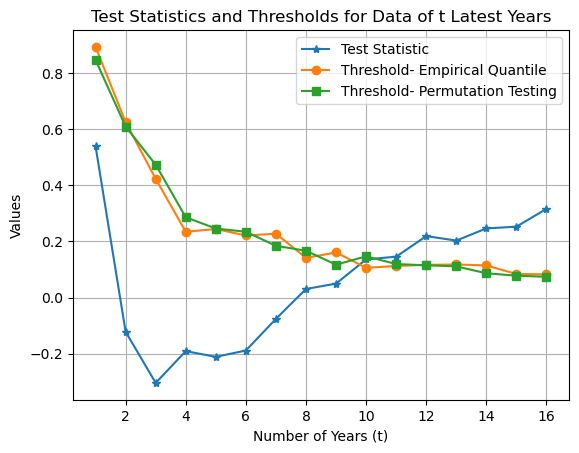

In [17]:
import matplotlib.pyplot as plt

# Assuming T0_values, T1_values, and T2_values are numpy arrays or lists containing the respective values

# Define the range of years
years = range(1, len(T0_values) + 1)

# Plot the values
plt.plot(years, T0_values, label='Test Statistic', marker='*')
plt.plot(years, T1_values, label='Threshold- Empirical Quantile', marker='o')
plt.plot(years, T2_values, label='Threshold- Permutation Testing', marker='s')

# Add labels and title
plt.xlabel('Number of Years (t)')
plt.ylabel('Values')
plt.title('Test Statistics and Thresholds for Data of t Latest Years')
plt.legend()
plt.savefig('NFL.pdf', format='pdf')
# Show the plot
plt.grid(True)
plt.show()


# Display the plot
plt.show()


In [ ]:
def compute_test_statistic(pihat,Z,K):
    n = len(pihat)
    T = 0
    # print(Z)
    for i in range(n):
        for j in range(n):
            pij_hat = pihat[i] + pihat[j]
            if K[i,j] > 1 and i!=j:
                T += ((pij_hat)**2 * (Z[i, j] * (Z[i, j] - 1))) / (K[i,j] * (K[i,j] - 1))  +    pihat[j]**2    -    2 * pihat[j] * pij_hat * (Z[i,j] / K[i,j])

    return T

In [ ]:
def compute_stationary_distribution(S):
    eigenvalues, eigenvectors = np.linalg.eig(S.T)
    dominant_eigenvalue_index = np.argmax(np.abs(eigenvalues))
    dominant_eigenvalue = eigenvalues[dominant_eigenvalue_index]
    stationary_dist = np.real_if_close(np.abs(eigenvectors[:, dominant_eigenvalue_index]))

    # Normalize the stationary distribution
    stationary_dist /= np.sum(stationary_dist)

    return stationary_dist

In [ ]:
def permute_entries(Z, K):
    n = len(Z)
    new_Z = [[[] for _ in range(n)] for _ in range(n)]  # Initialize new_Z as a nested list

    for i in range(n):
        for j in range(n):
            if i != j:
                # Combine Z[i][j] and Z[j][i] into a single list
                combined_entries = Z[i][j] + Z[j][i]
                
                # Shuffle the elements in the combined list
                random.shuffle(combined_entries)

                # Assign the first K[i][j] elements to Z[i][j]
                new_Z[i][j] = combined_entries[:K[i][j]]

                # Assign the last K[j][i] elements to Z[j][i]
                new_Z[j][i] = combined_entries[-K[j][i]:]

    return new_Z


In [ ]:
def construct_Z_empirical_and_Kij(Zlist):
    n = len(Zlist)
    Z_empirical = [[0] * n for _ in range(n)]
    Kij = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i!= j:
                count = sum(entry == (j, i) for entry in Zlist[i][j])
                Z_empirical[i][j] = count
                Kij[i][j] = len(Zlist[i][j])
        Kij[i][i] = 2
    return Z_empirical, Kij

In [ ]:
def compute_Tfromlist(Z):
    Zemp , K = construct_Z_empirical_and_Kij(Z)
    n = len(K)
    Zemp =np.array(Zemp)
    K = np.array(K)
    # print(Zemp)
    # print(K)
    # print(np.sum(K, axis=1))
    Shat = np.where((K == 0), 0, Zemp / (K * n))
    for i in range(n):
        Shat[i, i] = 1 - np.sum(Shat[i, :])

    pihat = compute_stationary_distribution(Shat)
    T0 = compute_test_statistic(pihat,Zemp,K)

    return T0

In [ ]:
import copy

def cycle_completion(pi, Zlist):
    n = len(pi)
    i = np.random.choice(range(n))
    Zlist2 = copy.deepcopy(Zlist)
    cycle = [i]
    lll = 0
    success =  False
    while lll < 10*n:
        j = np.random.choice(range(n))
        lll += 1
        # print(i,j,Zlist2) 
        if j != i and  len(Zlist2[i][j]) > 0:
            entry_num = np.random.choice(range(len(Zlist2[i][j])))
            entry = Zlist2[i][j][entry_num]
            #print(entry,entry[::-1], j,i)
            if entry == (j, i):
                Zlist2[i][j].remove(entry)
                Zlist2[j][i].append(entry[::-1])
                i = j
                lll = 0
                cycle.append(j)
                if i == cycle[0]:
                    success = True
                    break
    if success == False:
         print('I could not commplete the cycle')
            #   print(entry,entry[::-1], j,i)
    return Zlist2, success

In [ ]:
import random
n = 15 

permuted_T1 = []
permuted_T2 = []
newZ = cumulative_prob_matrix.values
newK = cumulative_count_matrix.values
Zlist = nested_list.values
T0 = compute_Tfromlist(Zlist)


for u in range(300):
    permZ = permute_entries(Zlist,newK)
    
    permuted_T1.append(compute_Tfromlist(permZ))
    for _ in range(40):
        status = False
        while not status: # sometimes the chain is not irreducible thats why
            dummy, status = cycle_completion(np.ones(n)/n, permZ)
    permZ = dummy
    permuted_T2.append(compute_Tfromlist(permZ))
    print(n*permuted_T1[-1],n*permuted_T2[-1])
# Sort permuted test statistics
sorted_T1 = np.sort(permuted_T1)
sorted_T2 = np.sort(permuted_T2)

# Calculate the 95% value
percentile_index = int(0.95 * len(permuted_T1))
T1_95th = sorted_T1[percentile_index]
T2_95th = sorted_T2[percentile_index]
print(n*T0,n*T1_95th, n*T2_95th)




In [ ]:
np.arange(10, 101, 15)

In [ ]:
a = [-0.014135029428783835, -0.01035334896443867, -0.019754493929506213, -0.0211277497556467, -0.010871098459750546, -0.01733415353471417, -0.020074245825828285, -0.011187088603470362, -0.00973494533792751, -0.013863765963976942, -0.021605773473217176, -0.004048517632813772, -0.013197326039448214, -0.007634512764557639, -0.01297837958452312, -0.016965143947566583, -0.009151435715771095, -0.016137993478072696, -0.018691295895308387, -0.011293953032500938, -0.011349785165692601, -0.01059676473639074, -0.014398930142051663, -0.010649126180015256, -0.014588406356499481, -0.015510487149642113, -0.014387841868063427, -0.02007671890156827, -0.012142984618324332, -0.017679774454733642, -0.01804212414828632, -0.017209358935761525, -0.012957712157555078, -0.01648465907723356, -0.016398744351662897, -0.008944908307521498, -0.014670652470735072, -0.017482694781960774, -0.013204843187454643, -0.00791482098903216, -0.016092786134264524, -0.010982906776447048, -0.020378515726874484, -0.015831960903200947, -0.0151120677183842, -0.017753384289324364, -0.02076081523403781, -0.014885845102372394, -0.015832740561163156, -0.015967002352225063, -0.011808486146165864, -0.01227012411099735, -0.006692330664098672, -0.01787728577577222, -0.01286512032137645, -0.019946283029483328, -0.01442681802650387, -0.008370631121279322, -0.020064241202914813, -0.006470609707310915, -0.02174378421687933, -0.008986000607894357, -0.010793313596878901, -0.015425385290896846, -0.008881488775572814, -0.016179999338008007, -0.019475379614770114, -0.016827449669873786, -0.009301888908754555, -0.009799711910672956, -0.012579029340689924, -0.009738843576478407, -0.014146329611988034, -0.01379057817476268, -0.008102507836644022, -0.022451451752081533, -0.008451691271673629, -0.01534769352022086, -0.008671329585756981, -0.01493100046579851, -0.018637156706730454, -0.013954412285973808, -0.015192124524630113, -0.01941966478737369, -0.015337698264636544, -0.009928794531901451, -0.01664519717927959, -0.01080885074118369, -0.017450184402762126, -0.012879531302655227, -0.018946467961225046, -0.01308256797319917, -0.012318554947109669, -0.01723309802714146, -0.014817119572594383, -0.022200282293712365, -0.015482837090716685, -0.016906163878163703, -0.017555987787186686, -0.00995377630922472]
np.sort(a)*35*8